<a href="https://colab.research.google.com/github/SchneiderJs/Alzheimer-s-Classifier/blob/main/AlzheimerIdentificationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 5069 images belonging to 3 classes.
Found 1267 images belonging to 3 classes.


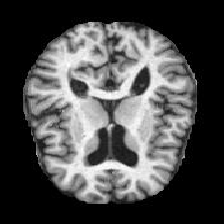

In [53]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator


base_folder = '/content/drive/My Drive/Dataset/Alzheimer_s Dataset/'

datagen = ImageDataGenerator()

train_generator = datagen.flow_from_directory(
    directory=f'{base_folder}/train/',
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = datagen.flow_from_directory(
    directory=f'{base_folder}/test/',
    target_size=(224, 224),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

cv2_imshow(x_train[0])

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=11, activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 214, 214, 32)      3904      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 69, 69, 16)        4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 18496)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                295952    
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)              

In [56]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 692ms/step - loss: 5.7396 - accuracy: 0.5000 - val_loss: 30.8059 - val_accuracy: 0.4375
Epoch 2/5
1/1 [==============================] - 1s 552ms/step - loss: 42.3956 - accuracy: 0.2188 - val_loss: 40.1768 - val_accuracy: 0.0938
Epoch 3/5
1/1 [==============================] - 1s 555ms/step - loss: 33.6202 - accuracy: 0.2188 - val_loss: 32.5477 - val_accuracy: 0.4688
Epoch 4/5
1/1 [==============================] - 1s 557ms/step - loss: 22.1532 - accuracy: 0.5625 - val_loss: 22.1559 - val_accuracy: 0.4688
Epoch 5/5
1/1 [==============================] - 1s 548ms/step - loss: 15.6670 - accuracy: 0.5625 - val_loss: 14.1343 - val_accuracy: 0.4688


In [40]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
        train_generator,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_generator,
        validation_steps=15)
model.save_weights('first_try.h5')